# 1. Single Linear Regression - Video Game Sales
## (Using one feature to predict a continuous numerical target)
## https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

In [562]:
#Import Statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [563]:
df_VideoGame = pd.read_csv('video_games_sales.csv')

# Visualizing the dataframe
df_VideoGame

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Let's see if we can use a subset of this data to predict the target variable: global_sales

In [564]:
# Exctracting Features from the original df_VideoGame Dataset
df_VideoGameFeatureSubset = df_VideoGame[['platform', 'year', 'genre', 'publisher','na_sales', 'global_sales']]

# Dropping null values from the dataset
df_VideoGameFeatureSubset.dropna(inplace=True)
df_VideoGameFeatureSubset.isnull().sum()

C:\Users\Juicy\AppData\Local\Temp\ipykernel_13848\2330514909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset.dropna(inplace=True)


platform        0
year            0
genre           0
publisher       0
na_sales        0
global_sales    0
dtype: int64

In [565]:
# Initialize the labelencoder object
le_videogame = LabelEncoder()

# Save the unencoded feature platform (In case you want to decode later)
df_VideoGame_decoded_platform = df_VideoGameFeatureSubset['platform']

# Override the original platform feature with the label encoded feature
df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])

# Print out the decoded series, platform
df_VideoGame_decoded_platform

C:\Users\Juicy\AppData\Local\Temp\ipykernel_13848\3575130277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])


0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: platform, Length: 16291, dtype: object

In [566]:
# Save the unencoded feature genre (In case you want to decode later)
df_VideoGame_decoded_genre = df_VideoGameFeatureSubset['genre']

# Override the original genre feature with the label encoded feature
df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])

# Print out the decoded series, genre
df_VideoGame_decoded_genre

C:\Users\Juicy\AppData\Local\Temp\ipykernel_13848\3503678093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])


0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: genre, Length: 16291, dtype: object

In [567]:
# Save the unencoded feature publisher (In case you want to decode later)
df_VideoGame_decoded_publisher = df_VideoGameFeatureSubset['publisher']

# Override the original publisher feature with the label encoded feature
df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])

# Print out the decoded series, publisher
df_VideoGame_decoded_publisher

C:\Users\Juicy\AppData\Local\Temp\ipykernel_13848\109776527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])


0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: publisher, Length: 16291, dtype: object

In [568]:
# Feel free to uncomment the chart below, may take a little while to output though
#sns.pairplot(df_VideoGameFeatureSubset.drop('global_sales', axis=1), kind='kde')

In [569]:
# View the labelencoded dataframe
df_VideoGameFeatureSubset

,platform,year,genre,publisher,na_sales,global_sales
0,26,2006.0,10,359,41.49,82.74
1,11,1985.0,4,359,29.08,40.24
2,26,2008.0,6,359,15.85,35.82
3,26,2009.0,10,359,15.75,33.00
4,5,1996.0,7,359,11.27,31.37
...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,0.01
16594,7,2003.0,8,241,0.01,0.01
16595,16,2008.0,6,21,0.00,0.01
16596,4,2010.0,5,8,0.00,0.01


In [570]:
# Normailze platform, year, genre, and publisher
mm_scaler = MinMaxScaler(feature_range=(-1, 1))

df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])
df_VideoGameFeatureSubset

C:\Users\Juicy\AppData\Local\Temp\ipykernel_13848\2534807158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])


,platform,year,genre,publisher,na_sales,global_sales
0,0.733333,0.30,0.818182,0.248696,41.49,82.74
1,-0.266667,-0.75,-0.272727,0.248696,29.08,40.24
2,0.733333,0.40,0.090909,0.248696,15.85,35.82
3,0.733333,0.45,0.818182,0.248696,15.75,33.00
4,-0.666667,-0.20,0.272727,0.248696,11.27,31.37
...,...,...,...,...,...,...
16593,-0.600000,0.10,-0.272727,-0.064348,0.01,0.01
16594,-0.533333,0.15,0.454545,-0.161739,0.01,0.01
16595,0.066667,0.40,0.090909,-0.926957,0.00,0.01
16596,-0.733333,0.50,-0.090909,-0.972174,0.00,0.01


In [571]:
# Create a pairplot for the normalized data, columns_to_manipulate, use kde for the kind
#sns.pairplot(df_VideoGameFeatureSubset, kind='kde')

In [572]:
# Save Checkpoint
df_VideoGameFeatureSubset.to_csv('Game_Data_Cleaned.csv')

In [573]:
# Load the cleaned video game sales data into a dataframe
df_VideoGameCleaned = pd.read_csv('Game_Data_Cleaned.csv')

# Remove the column named 'Unnamed: 0'
df_VideoGameCleaned = df_VideoGameCleaned.drop(columns=['Unnamed: 0'])

# print out the dataframe
df_VideoGameCleaned

,platform,year,genre,publisher,na_sales,global_sales
0,0.733333,0.30,0.818182,0.248696,41.49,82.74
1,-0.266667,-0.75,-0.272727,0.248696,29.08,40.24
2,0.733333,0.40,0.090909,0.248696,15.85,35.82
3,0.733333,0.45,0.818182,0.248696,15.75,33.00
4,-0.666667,-0.20,0.272727,0.248696,11.27,31.37
...,...,...,...,...,...,...
16286,-0.600000,0.10,-0.272727,-0.064348,0.01,0.01
16287,-0.533333,0.15,0.454545,-0.161739,0.01,0.01
16288,0.066667,0.40,0.090909,-0.926957,0.00,0.01
16289,-0.733333,0.50,-0.090909,-0.972174,0.00,0.01


In [574]:
# use the pandas dataframe function called .corr() to quickly check which features most closely 'relate' to the target variable, higher is better
df_VideoGameCleaned.corr()['global_sales'].sort_values(ascending=False)

global_sales    1.000000
na_sales        0.941269
platform        0.027929
genre           0.022215
publisher       0.019368
year           -0.074647
Name: global_sales, dtype: float64

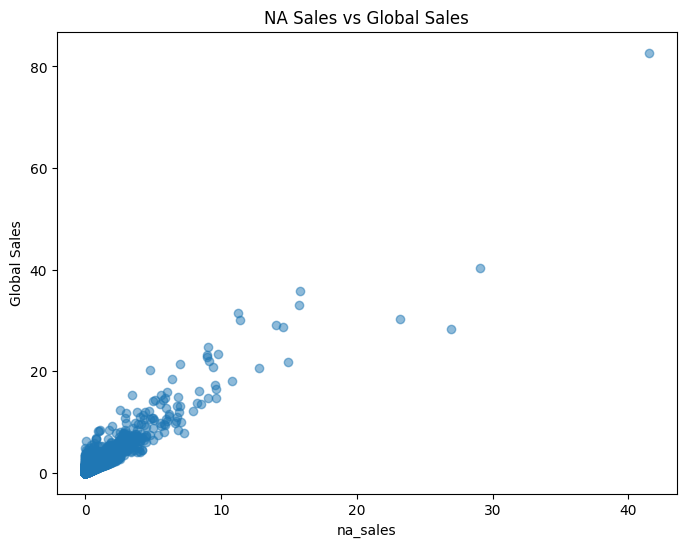

In [575]:
# create a 2D scatter plot to 'eyeball' the relationship between your chosen feature and global_sales
plt.figure(figsize=(8, 6))
plt.scatter(df_VideoGameCleaned['na_sales'], df_VideoGameCleaned['global_sales'], alpha=0.5)
plt.xlabel('na_sales')
plt.ylabel('Global Sales')
plt.title('NA Sales vs Global Sales')
plt.show()


In [576]:
# Seperate the Features and the Target
X = df_VideoGameCleaned.drop(columns=['global_sales'])
y = df_VideoGameCleaned['global_sales']


In [577]:
# Print the feature dataframe
X

,platform,year,genre,publisher,na_sales
0,0.733333,0.30,0.818182,0.248696,41.49
1,-0.266667,-0.75,-0.272727,0.248696,29.08
2,0.733333,0.40,0.090909,0.248696,15.85
3,0.733333,0.45,0.818182,0.248696,15.75
4,-0.666667,-0.20,0.272727,0.248696,11.27
...,...,...,...,...,...
16286,-0.600000,0.10,-0.272727,-0.064348,0.01
16287,-0.533333,0.15,0.454545,-0.161739,0.01
16288,0.066667,0.40,0.090909,-0.926957,0.00
16289,-0.733333,0.50,-0.090909,-0.972174,0.00


In [578]:
# Print the target dataframe
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16286     0.01
16287     0.01
16288     0.01
16289     0.01
16290     0.01
Name: global_sales, Length: 16291, dtype: float64

In [579]:
# use train_test_split to get your dataset ready for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42
)

# print out the shape of the trainig and testing, feature and targets
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (13032, 5)
Shape of X_test:  (3259, 5)
Shape of y_train:  (13032,)
Shape of y_test:  (3259,)


In [580]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Initalize the LinearRegression object
lr = LinearRegression()

#!!! Important !!!
# Fit your Linear Regressor on only ** one ** of the features in your X's, 
# HINT: If you have multiple features in your X_train, select your chosen feature for singular linear regression and make a new dataframe

single_feature = 'na_sales'

X_train_single = X_train[[single_feature]]
X_test_single  = X_test[[single_feature]]
lr = LinearRegression()
lr.fit(X_train_single, y_train) 

# Get your predictions from your fitted model
y_pred_single = lr.predict(X_test_single) #Feed X-test_single into the model, and get y_pred_single as the output predictions

# use the model's class function .score to calculate the r^2 value
r2_single = lr.score(X_test_single, y_test)
print("R² value for single linear regression:", r2_single)

# print out the r2 value for the linear regressor
r2_single

R² value for single linear regression: 0.9208878288847474


0.9208878288847474

In [581]:
# Coefficients and intercept (y = wx + b), where w is the weight, or coefficent of x, and b is the y-intercept
print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficients: [1.7386314]
Intercept: 0.0773267849579013


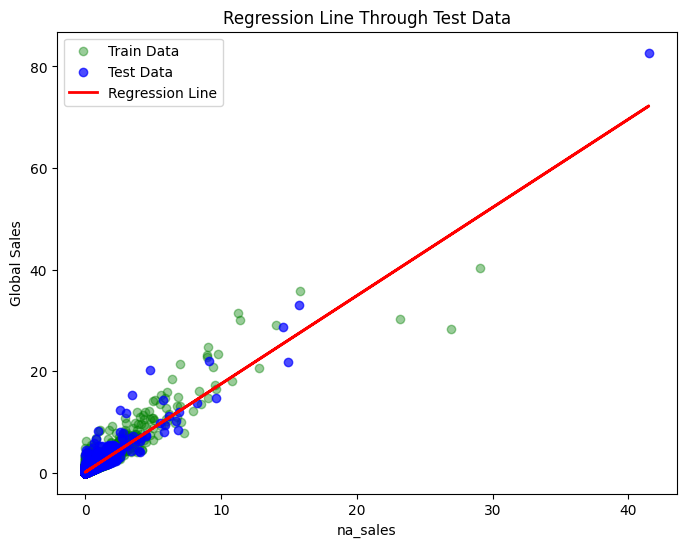

In [582]:
# Use a scatter plot to show how the line passes through the dataset
# You can optionally spilt the train and test set by color, and plot the line by passing X_test, and y_pred
plt.figure(figsize=(8,6))

# Train data (faded)
plt.scatter(X_train_single, y_train, color="green", alpha=0.4, label="Train Data")

# Test data
plt.scatter(X_test_single, y_test, color="blue", alpha=0.7, label="Test Data")

# Regression line
plt.plot(X_test_single, y_pred_single, color="red", linewidth=2, label="Regression Line")

plt.xlabel(single_feature)
plt.ylabel("Global Sales")
plt.title("Regression Line Through Test Data")
plt.legend()
plt.show()


### Linear Regression Questions: 

1. What was the final r^2 value of your model? 
2.  What does this tell us? 

- The final R² value of the model was **0.9209**.  
This means NA sales alone explain about **92% of the variation** in global sales, showing a very strong linear relationship.



3. Can we get more performance from this model? 
4. If so, how? If not, why?

- the model could improve slightly by adding more features.  
Global sales depend on multiple regions, so including EU, JP, or Other sales would give the model more information.

5. Would it be beneficial to perform multiple linear regresssion? I.e. use several features to predict the target?
6. Why?

- Multiple linear regression would likely perform better.  
Using several features helps capture more factors that influence global sales


7. Why is there one feature in particular that tracks so well with the target, global_sales?

- NA sales track closely with global sales since they make up a major portion of total sales.  
Games that sell well in NA usually sell well globally which means a strong linear pattern.



### Process Inaccuracies

- The original data was changed directly when encoding the features. This can make it harder to go back or compare the cleaned data later.
- The encoded values for categories like platform and genre were turned into numbers, but the numbers don’t actually represent real “order.”
- Scaling is'nt needed for simple linear regression.
- The notebook trained the model before defining the single feature na_sales
- Only one feature was used so the model ignores other important information that affects global sales.
- The cleaned CSV was saved and reloaded could be questionable


# 2. Multi Classification - Classify the *"Quality"* variable (3~9) for Wine Data
## Use the numeric features in the wine dataset to predict a 'class'
## https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

In [583]:
# Load the wine dataset
df_wine = pd.read_csv('wine_data.csv')
df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9


In [584]:
# this feature will be our target variable
df_wine.quality.unique()

array([3, 4, 5, 6, 7, 8, 9])

In [585]:
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [586]:
y = df_wine.quality
y

0        3
1        3
2        3
3        3
4        3
        ..
20995    9
20996    9
20997    9
20998    9
20999    9
Name: quality, Length: 21000, dtype: int64

In [587]:
X = df_wine.drop('quality', axis=1)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9


In [588]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler(feature_range=(-1, 1))

X = mm_scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df_wine.drop('quality', axis=1).columns)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.289256,-0.333333,-0.204819,-0.950920,-0.784053,-0.937500,-0.811060,-0.472142,-0.178295,-0.606742,-0.710145
1,0.090909,-0.293333,-0.409639,-0.953988,-0.365449,-0.972222,-0.953917,-0.526123,-0.317829,-0.539326,-0.884058
2,-0.404959,0.473333,-1.000000,-0.888037,-0.707641,-0.972222,-0.963134,-0.634085,0.410853,-0.640449,-0.217391
3,0.090909,-0.520000,-0.493976,-0.972393,-0.548173,-0.770833,-0.806452,-0.567766,0.023256,-0.280899,-0.449275
4,-0.256198,0.253333,-0.975904,-0.914110,-0.750831,-0.965278,-0.976959,-0.544631,0.178295,-0.696629,-0.130435
...,...,...,...,...,...,...,...,...,...,...,...
20995,-0.024793,0.253333,0.096386,0.515337,0.338870,-0.211111,-0.190323,0.300945,-0.100775,-0.247191,0.159420
20996,0.057851,-0.293333,0.060241,0.631902,-0.199336,-0.573611,-0.084332,0.567380,0.240310,0.033708,-0.507246
20997,0.586777,-0.493333,0.253012,0.579755,0.461794,-0.569444,0.232719,0.506458,-0.736434,0.730337,-0.623188
20998,-0.537190,0.266667,0.313253,-0.242331,-0.571429,0.241667,0.331797,0.451706,-0.658915,0.483146,0.420290


In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=1)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (16800, 11)
Shape of X_test:  (4200, 11)
Shape of y_train:  (16800,)
Shape of y_test:  (4200,)


In [590]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.6261904761904762
              precision    recall  f1-score   support

           3       0.59      0.65      0.62       633
           4       0.59      0.58      0.59       593
           5       0.77      0.62      0.69       611
           6       0.68      0.74      0.71       594
           7       0.75      0.51      0.60       612
           8       0.56      0.59      0.58       575
           9       0.53      0.69      0.60       582

    accuracy                           0.63      4200
   macro avg       0.64      0.63      0.63      4200
weighted avg       0.64      0.63      0.63      4200



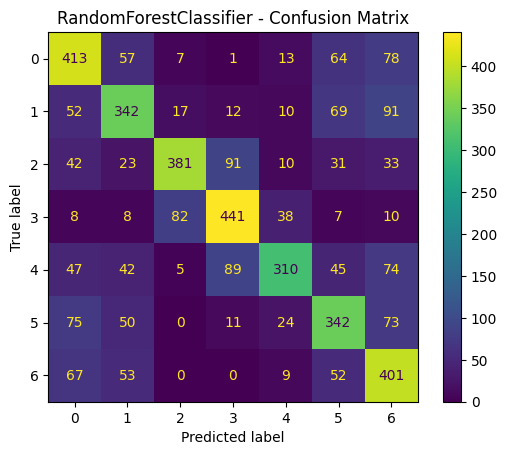

In [591]:
# Calculate the confusion matrix by passing the true y lables, and the predicted y lables
cm = confusion_matrix(y_test, y_pred)

# Use the ConfusionMatrixDisplay from skelearn to get a quick and easy graph
ConfusionMatrixDisplay(cm).plot()
plt.title('RandomForestClassifier - Confusion Matrix')
plt.show()

### Multiclass Classifier Questions
1. Summarize the steps I took to create this multiclass classifier
   - Loaded Wine dataset
   - Separated target variable from features
   - Scaled features columns using MinMaxScaler to normalize input range
   - Split data into training and testing sets 
   - Evaluated the model using accuracy, classification report, and confusion matrix

2. Interpret the Confusion Matrix and Classification Report
   - Most predictions fall along the diagonal the model performs well.
   - Classification report shows best on the most common classes and struggles on rare classes

3. How could we improve this model? Be specific.
   - Maybe adjusting settings of the RandomForest model to help it learn patterns better
   - Give it more balanced data, since some wine qualities show up a lot more than others
   - 
4. What other models might be good to solve this problem?
   - Try other models that work well with many features, such as Gradiant Boosting, since they learn better from previous mistakes.
5. What are the potential downsides of solving this as a classification problem?
   - Wine quality is really more of a score on a scale not a hard category
6. What are the benifits of solving this as a classification problem?
   - Easier to understand and evaluate 
   

### Process Inaccuracies

- The wine quality scores were treated as separate categories even though the numbers are more like a rating scale
- The dataset is unbalanced some qualities appear way more than others. This makes the model bad at predicting rare quality.
- No tuning or adjusting of the Random Forest settings was done.
- The code doesn’t explore which features are actually important so we don’t know why the model worked the way it did


# 3. Binary Classification - Cure The Princess
## https://www.kaggle.com/datasets/unmoved/cure-the-princess

In [592]:
df_Quest = pd.read_csv('Cure_the_princess.csv')
df_Quest

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


In [593]:
# Envoke the describe command on the dataset
df_Quest.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


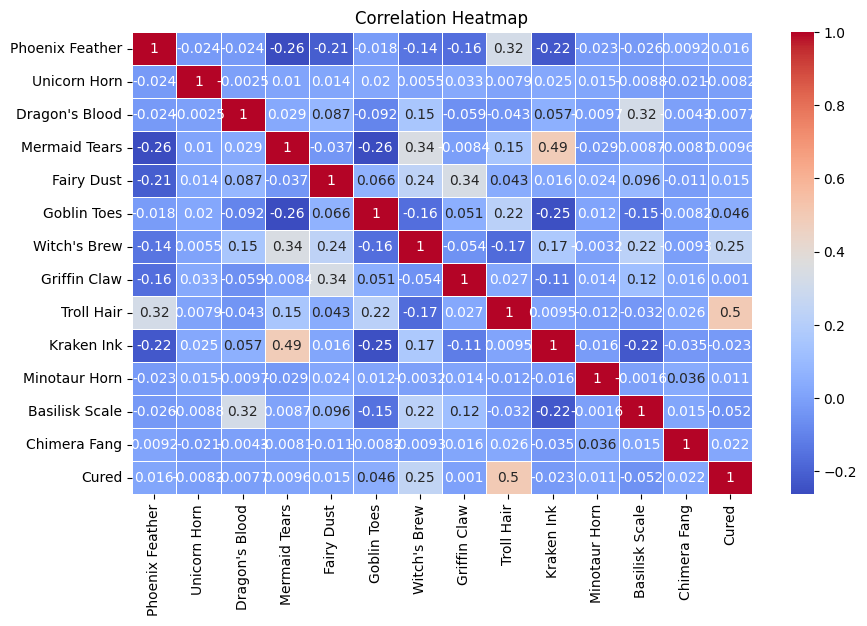

In [594]:
# Plot the values from the .corr() command on a heat map
corr_matrix = df_Quest.corr()
corr_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [595]:
# Seperate your ingredients (features) from the outcome (target)
X = df_Quest.drop('Cured', axis=1)
X

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1


In [596]:
# Seperate out Cured (target)
y = df_Quest.Cured
y

0       0
1       0
2       1
3       1
4       0
       ..
2333    0
2334    1
2335    1
2336    1
2337    1
Name: Cured, Length: 2338, dtype: int64

In [597]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initalize the MinMaxScaler with feature_range=(-1, 1)
mm_scaler = MinMaxScaler(feature_range=(-1, 1))
# Transform the Ingridents (X) using the MinMaxScaler
X_scaled = mm_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [598]:
# Seperate the training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    shuffle=True, 
    random_state=1
)

# print the shape of your datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1870, 13)
Shape of X_test: (468, 13)
Shape of y_train: (1870,)
Shape of y_test: (468,)


In [599]:
# Import Statements
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

# Initialize and train a LogisticRegressior
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train) 

# Make class predictions 
y_pred = log_model.predict(X_test)

# Make probability predicitons, named y_proba
y_proba = log_model.predict_proba(X_test)

# Evaluate accuracy using the accuracy_score function from sklearn
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# print the classification_report for your logistic regressor
print(classification_report(y_test, y_pred))

Accuracy: 0.8653846153846154
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       238
           1       0.86      0.87      0.86       230

    accuracy                           0.87       468
   macro avg       0.87      0.87      0.87       468
weighted avg       0.87      0.87      0.87       468



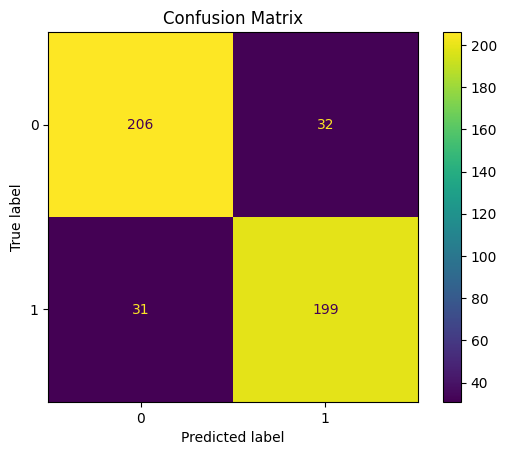

In [600]:
# Create a confusion matrix using the confusion_matrix function, and save it to a variable named cm
cm = confusion_matrix(y_test, y_pred)

# Using ConfusionMatrixDisplay pass your variable named cm that you just created
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

In [601]:
# use the (receiver operating characteristic) roc_curve function to calculate the falsepositive_rate, truepositive_rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# use the roc_auc_score to calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_proba[:, 1])

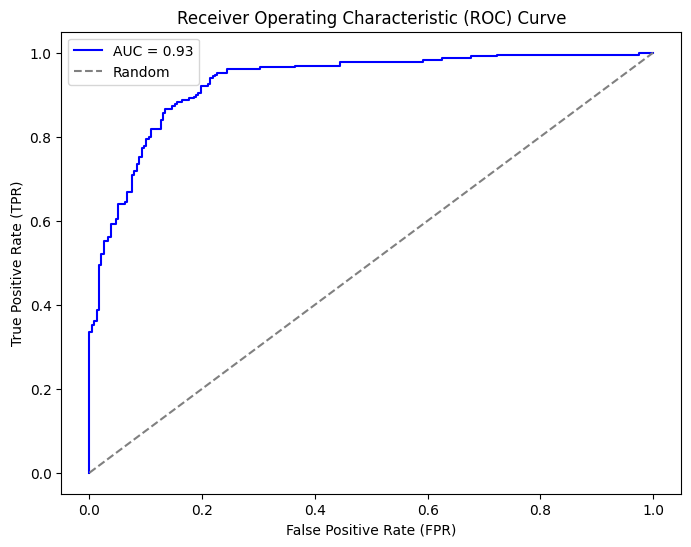

In [602]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(False)
plt.show()

### Cure the Princess
1. What ingredients should you use?
    - Troll Hair and Witch's brew cured the princess usually.
2. How can you be certain that these are the correct ingredients?
    - These ingredients show up the most in successful cures in the dataset.
3. Can you determine the **exact ratio** of ingredients that maximizes the princess' survival?
    - The data does'nt give one perfect recipe just shows which ingredients help the most
4. Should attempt to convience the king that you know to cure the princess, or should you conduct more experiments?
    - Im confident but not sure. Definitely conduct more experiments to find something more predictable.
5. *Assuming* that you are ready to cure the princess, convince the king.
    - Hey brother, I studied all the pots and found there's a pattern. They all used Troll Hair and more Witch's Brew. I am only following what actually worked. If the princess has a "chance" this is the recipe that gives her the "chance". Let me know whatchu think fam. The rest is your fault for not keeping her safe.

### Process Inaccuracies

- Scaling was applied, but the scaled version of the data X_scaled wasn’t actually used in training
- The model wasn’t checked for things like ingredient interactions or whether any ingredients were too much
- No testing was done to see how changing probability might affect the results.
- Only one model was tested.